In [1]:
import pandas as pd
import numpy as np 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from datetime import date, timedelta
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

In [2]:
countries = ['India', 'USA', 'United Kingdom', 'Russia', 'Iran']

In [3]:
countries1 = ['India', 'USA', 'Russia', 'Iran']

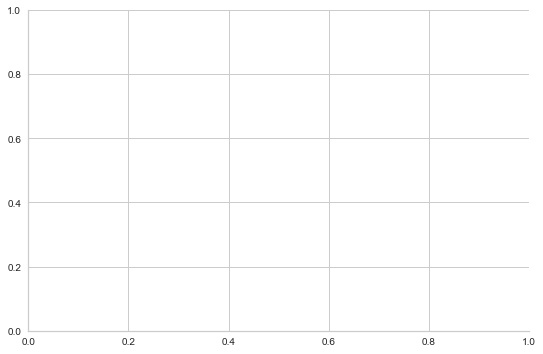

In [4]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [5]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [6]:
csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases", "new_tests", "new_deaths"])
df['date'] = pd.to_datetime(df.date)
df.dropna(inplace=True)
df.head()
df.isna()

,location,date,new_cases,new_deaths,new_tests
902,False,False,False,False,False
903,False,False,False,False,False
904,False,False,False,False,False
905,False,False,False,False,False
906,False,False,False,False,False
...,...,...,...,...,...
86427,False,False,False,False,False
86428,False,False,False,False,False
86429,False,False,False,False,False
86430,False,False,False,False,False


In [7]:
data_ind = df[df["location"] == "India"] #India
data_ind_features = data_ind.drop(['location', 'date', 'new_cases'], axis = 1)
data_ind_target = data_ind['new_cases'].copy()

data_usa = df[df['location'] == 'United States'] #United States
data_usa_features = data_usa.drop(['location', 'date', 'new_cases'], axis = 1)
data_usa_target = data_usa['new_cases'].copy()

data_uk = df[df['location'] == 'United Kingdom'] #United Kingdom
data_uk_features = data_uk.drop(['location', 'date', 'new_cases'], axis = 1)
data_uk_target = data_uk['new_cases'].copy()

data_russia = df[df['location'] == 'Russia'] #Russia
data_russia_features = data_russia.drop(['location', 'date', 'new_cases'], axis = 1)
data_russia_target = data_russia['new_cases'].copy()

data_iran = df[df['location'] == 'Iran'] #Iran
data_iran_features = data_iran.drop(['location', 'date', 'new_cases'], axis = 1)
data_iran_target = data_iran['new_cases'].copy()

In [8]:
scaler = StandardScaler()
data_ind_features_sc = scaler.fit_transform(data_ind_features)
data_usa_features_sc = scaler.fit_transform(data_usa_features)
data_uk_features_sc = scaler.fit_transform(data_uk_features)
data_russia_features_sc = scaler.fit_transform(data_russia_features)
data_iran_features_sc = scaler.fit_transform(data_iran_features)

In [9]:
train_india_x, test_india_x, train_india_y, test_india_y  = train_test_split(data_ind_features_sc, data_ind_target, test_size = 0.2)
train_usa_x, test_usa_x , train_usa_y, test_usa_y = train_test_split(data_usa_features_sc, data_usa_target, test_size = 0.2)
train_uk_x, test_uk_x, train_uk_y, test_uk_y = train_test_split(data_uk_features_sc, data_uk_target, test_size = 0.2)
train_russia_x, test_russia_x, train_russia_y, test_russia_y = train_test_split(data_russia_features_sc, data_russia_target, test_size = 0.2)
train_iran_x, test_iran_x, train_iran_y, test_iran_y = train_test_split(data_iran_features_sc, data_iran_target, test_size = 0.2)

In [10]:
india_lreg = LinearRegression()
usa_lreg = LinearRegression()
russia_lreg = LinearRegression()
uk_lreg = LinearRegression()
iran_lreg = LinearRegression()

In [11]:
india_lreg.fit(train_india_x, train_india_y)
usa_lreg.fit(train_usa_x, train_usa_y)
russia_lreg.fit(train_russia_x, train_russia_y)
uk_lreg.fit(train_uk_x, train_uk_y)
iran_lreg.fit(train_iran_x, train_iran_y)

LinearRegression()

In [12]:
def calcRMSE(model,x,y):
    predictions = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [13]:
rmse_for_lreg =list()

india_lreg_rmse = calcRMSE(india_lreg, test_india_x, test_india_y)
usa_lreg_rmse = calcRMSE(usa_lreg, test_usa_x, test_usa_y)
russia_lreg_rmse = calcRMSE(russia_lreg, test_russia_x, test_russia_y)
uk_lreg_rmse = calcRMSE(uk_lreg, test_uk_x, test_uk_y)
iran_lreg_rmse = calcRMSE(iran_lreg, test_iran_x, test_iran_y)

rmse_for_lreg.extend([india_lreg_rmse, usa_lreg_rmse, russia_lreg_rmse, iran_lreg_rmse])

print(rmse_for_lreg)

[28694.735019933698, 33043.454269121066, 4108.015321343435, 2336.5960103673874]


In [14]:
india_rfr = RandomForestRegressor()
usa_rfr = RandomForestRegressor()
uk_rfr = RandomForestRegressor()
russia_rfr = RandomForestRegressor()
iran_rfr = RandomForestRegressor()

In [15]:
india_rfr.fit(train_india_x, train_india_y)
usa_rfr.fit(train_usa_x, train_usa_y)
uk_rfr.fit(train_uk_x, train_uk_y)
russia_rfr.fit(train_russia_x, train_russia_y)
iran_rfr.fit(train_iran_x, train_iran_y)

RandomForestRegressor()

In [16]:
rmse_for_rfr = list()

india_rfr_rmse = calcRMSE(india_rfr, test_india_x, test_india_y)
usa_rfr_rmse = calcRMSE(usa_rfr, test_usa_x, test_usa_y)
uk_rfr_rmse = calcRMSE(uk_rfr, test_uk_x, test_uk_y)
russia_rfr_rmse = calcRMSE(russia_rfr, test_russia_x, test_russia_y)
iran_rfr_rmse = calcRMSE(iran_rfr, test_iran_x, test_iran_y)

rmse_for_rfr.extend([india_rfr_rmse, usa_rfr_rmse, russia_rfr_rmse, iran_rfr_rmse])
print(rmse_for_rfr)

[29691.792698217767, 29048.681843629605, 3717.322012406279, 2174.915658908591]


In [17]:
pred_india_lreg = india_lreg.predict(data_ind_features_sc)
pred_usa_lreg = usa_lreg.predict(data_usa_features_sc)
pred_uk_lreg = uk_lreg.predict(data_uk_features_sc)
pred_russia_lreg = russia_lreg.predict(data_russia_features_sc)
pred_iran_lreg = iran_lreg.predict(data_iran_features_sc)

In [18]:
pred_india_rfr = india_rfr.predict(data_ind_features_sc)
pred_usa_rfr = usa_rfr.predict(data_usa_features_sc)
pred_uk_rfr = uk_rfr.predict(data_uk_features_sc)
pred_russia_rfr = russia_rfr.predict(data_russia_features_sc)
pred_iran_rfr = iran_rfr.predict(data_iran_features_sc)

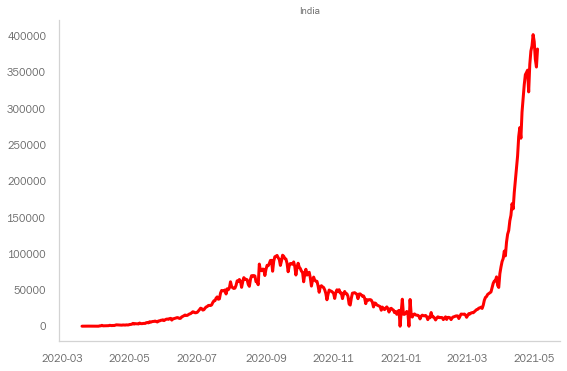

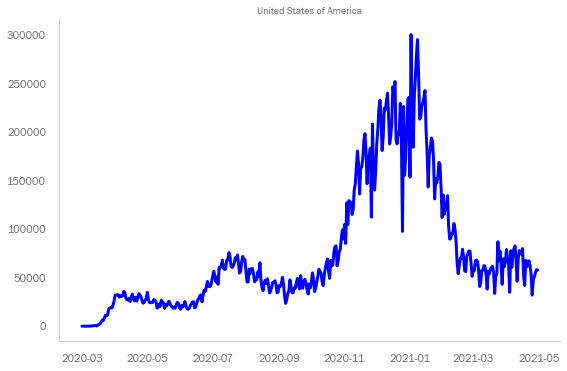

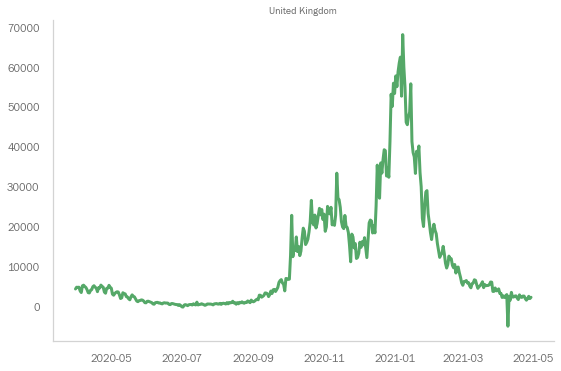

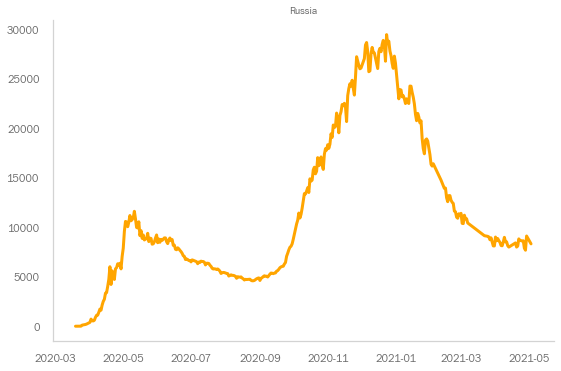

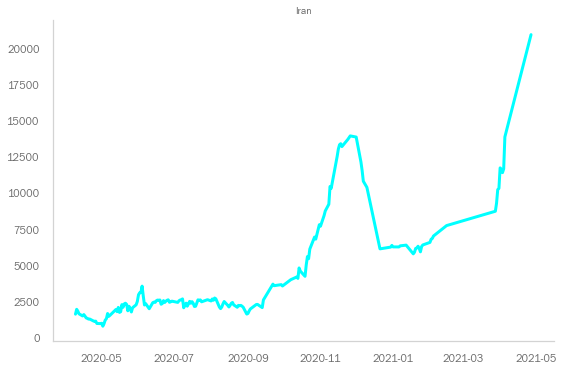

In [19]:
fig=plt.figure(figsize=(12,10))
fig, plt.plot(data_ind['date'],data_ind['new_cases'],color = 'red', linewidth = 3)
fig, plt.title('India', size = 10)
plt.show()
fig.savefig('E:/webapp/india_graph/india_graph.png', bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'], data_usa['new_cases'], color = 'blue', linewidth = 3)
plt.title('United States of America', size = 10)
plt.show()
fig1.savefig('E:/webapp/usa_graph/usa_graph.png', bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'], data_uk['new_cases'], color = 'g' , linewidth = 3)
plt.title('United Kingdom', size = 10)
plt.show()
fig2.savefig('E:/webapp/uk_graph/uk_graph.png', bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'], data_russia['new_cases'], color ='orange', linewidth = 3)
plt.title('Russia', size = 10)
plt.show()
fig3.savefig('E:/webapp/russia_graph/russia_graph.png', bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_iran['date'], data_iran['new_cases'], color = 'cyan', linewidth = 3)
plt.title('Iran', size = 10)
plt.show()
fig4.savefig('E:/webapp/iran_graph/iran_graph.png', bbox_inches = "tight")

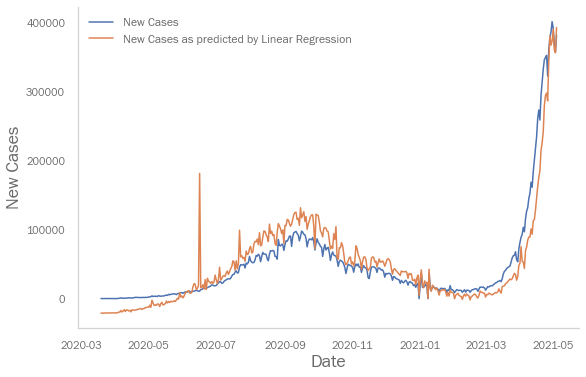

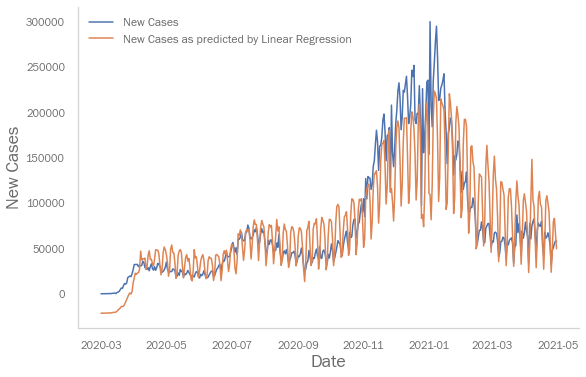

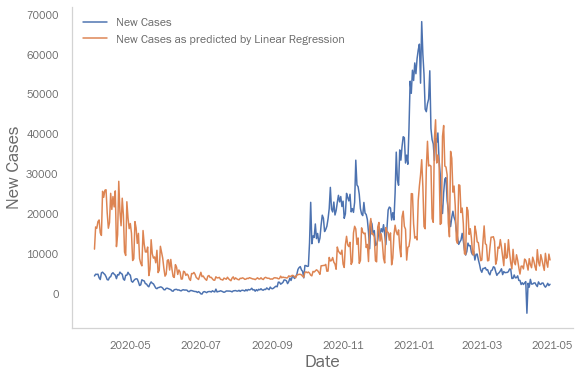

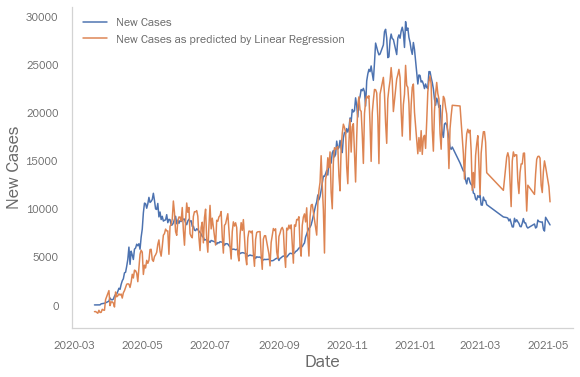

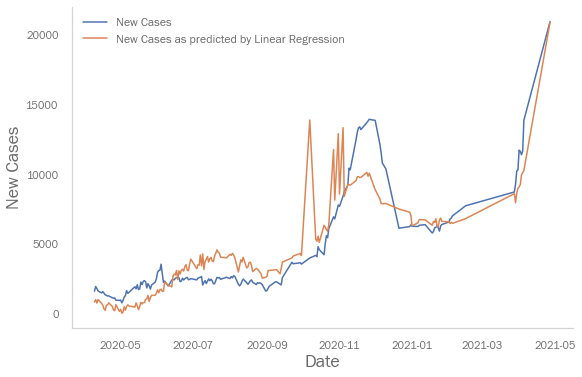

In [20]:
fig=plt.figure(figsize=(12,10))
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig.savefig("E:/webapp/india_lr_pred/india_lr_pred.png", bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig1.savefig("E:/webapp/usa_lr_pred/usa_lr_pred.png", bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig2.savefig("E:/webapp/uk_lr_pred/uk_lr_pred.png", bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig3.savefig("E:/webapp/russia_lr_pred/russia_lr_pred.png", bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_iran['date'],data_iran['new_cases'])
plt.plot(data_iran['date'],pred_iran_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig4.savefig("E:/webapp/iran_lr_pred/iran_lr_pred.png", bbox_inches = "tight")

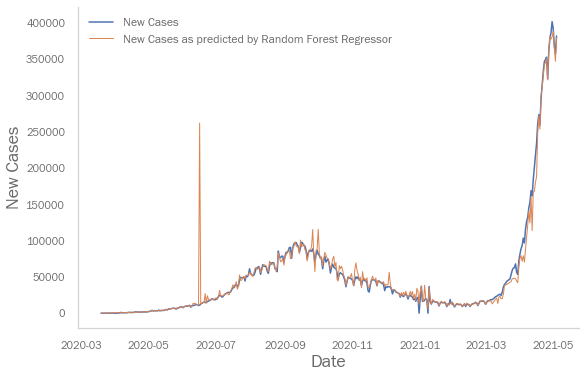

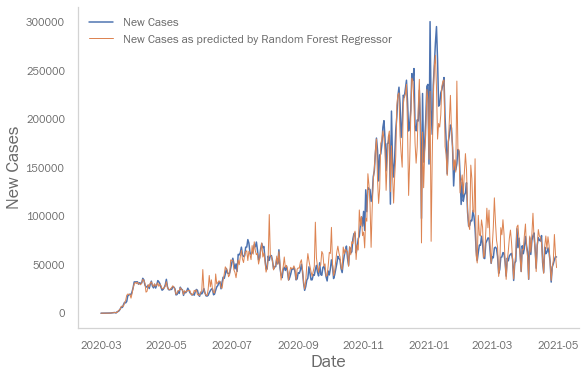

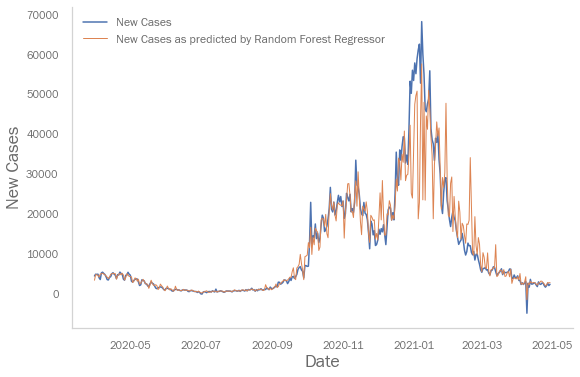

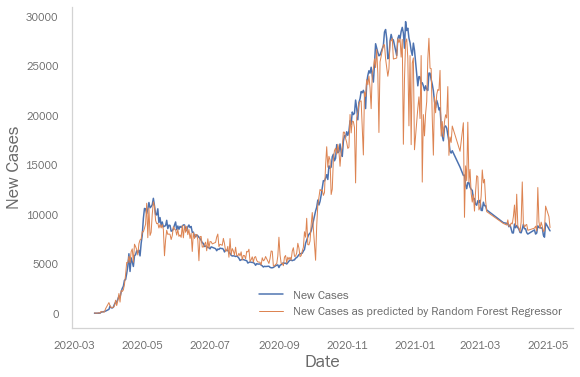

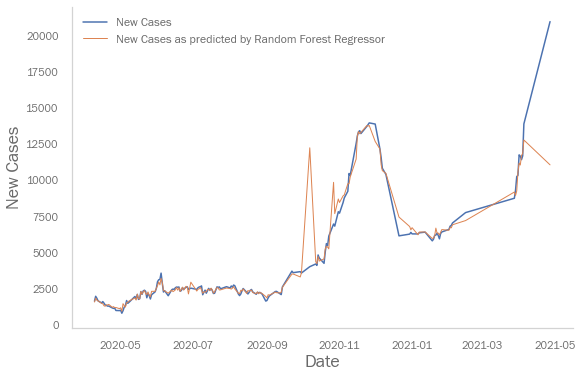

In [21]:
fig=plt.figure(figsize=(12,10))
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig.savefig("E:/webapp/india_rfr_pred/india_rfr_pred.png", bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig1.savefig("E:/webapp/usa_rfr_pred/usa_rfr_pred.png", bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_rfr,linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig2.savefig("E:/webapp/uk_rfr_pred/uk_rfr_pred.png", bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig3.savefig("E:/webapp/russia_rfr_pred/russia_rfr_pred.png", bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_iran['date'],data_iran['new_cases'])
plt.plot(data_iran['date'],pred_iran_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig4.savefig("E:/webapp/iran_rfr_pred/iran_rfr_pred.png", bbox_inches = "tight")

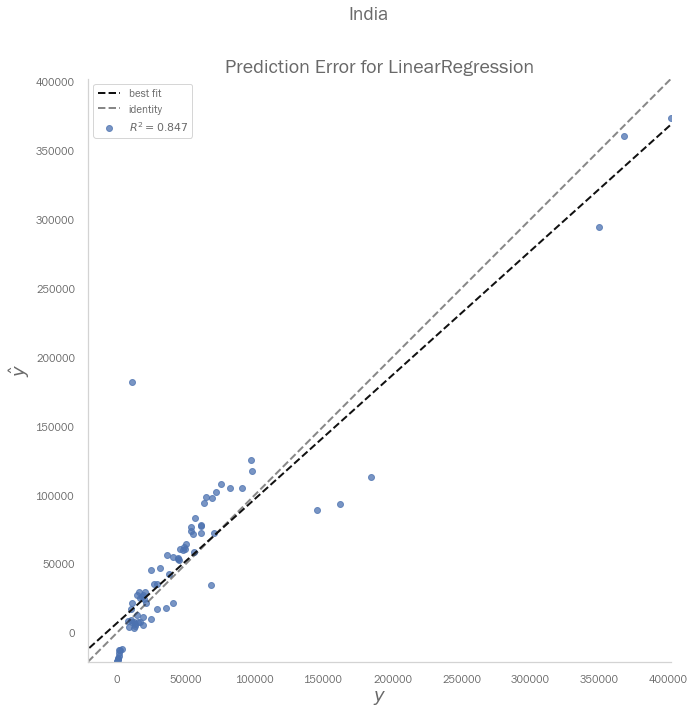

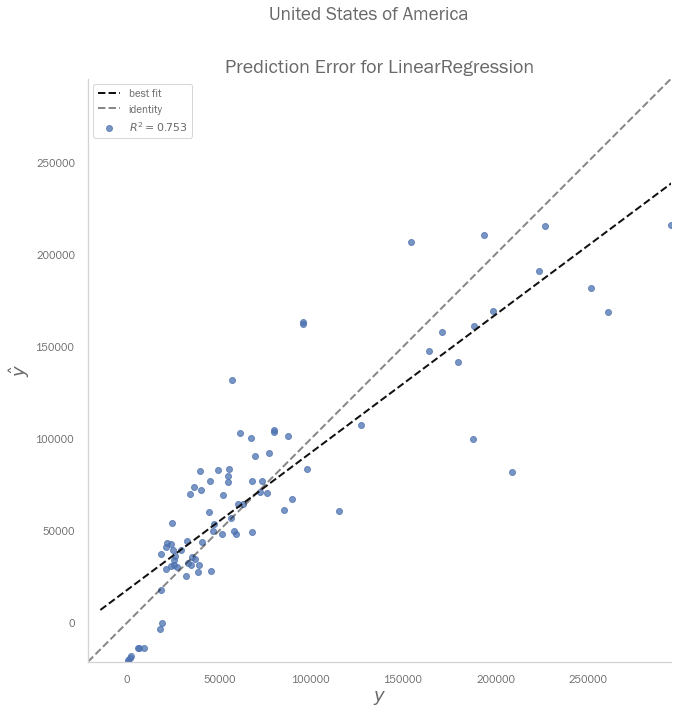

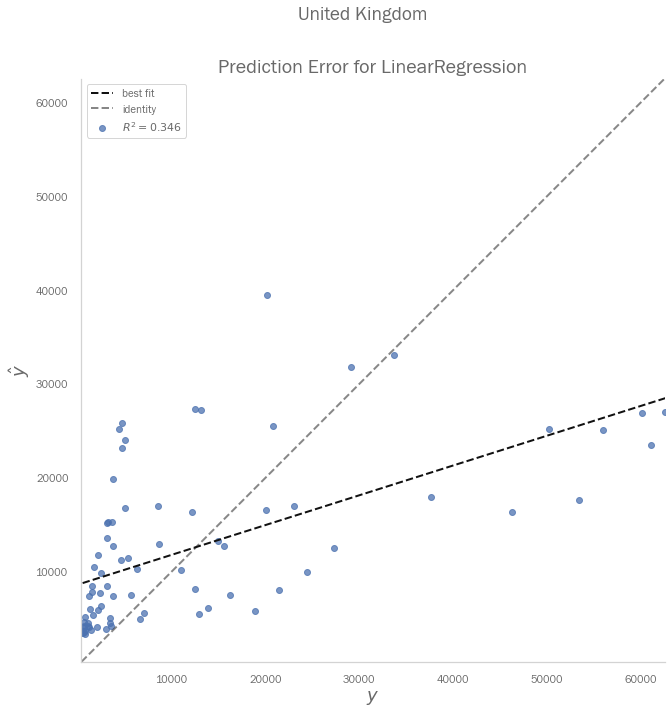

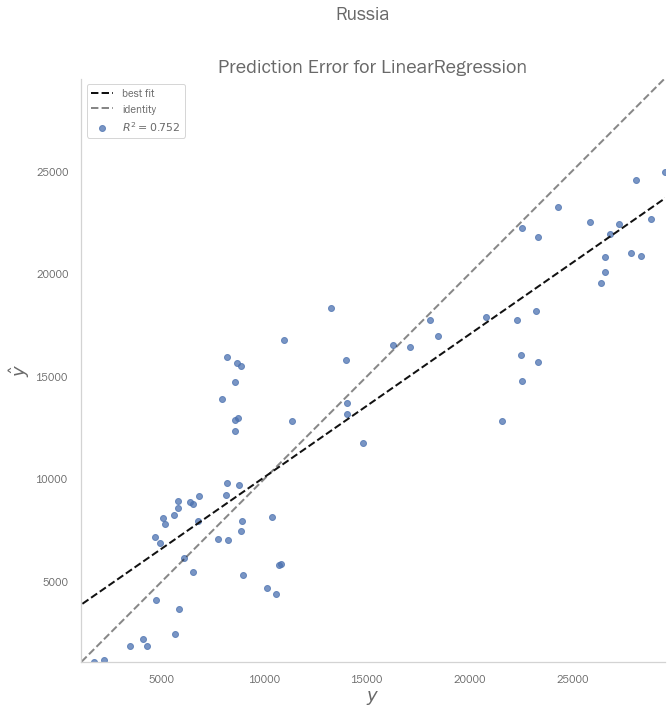

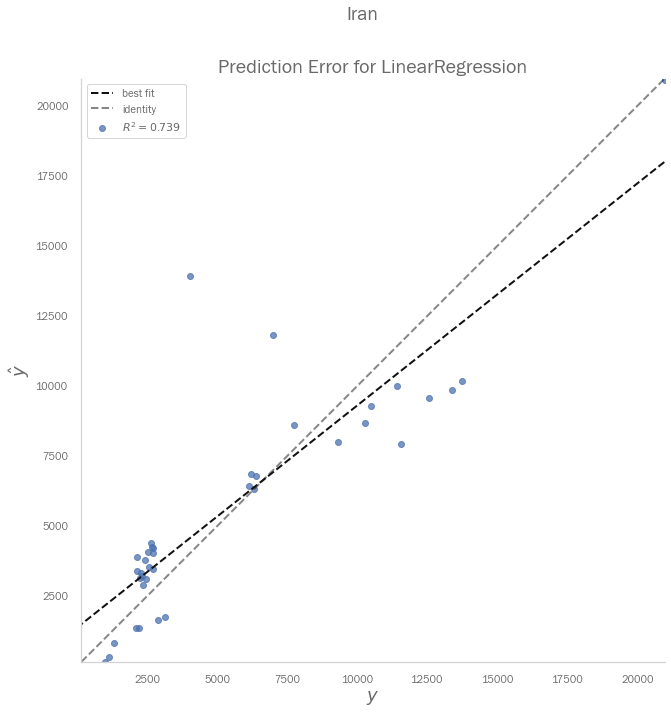

In [22]:
f = plt.figure(figsize =(10,10))
f.suptitle("India")
viz_india_lreg = prediction_error(india_lreg, train_india_x, train_india_y, test_india_x, test_india_y, )


f1 = plt.figure(figsize =(10,10))
f1.suptitle("United States of America")
viz_usa_lreg = prediction_error(usa_lreg, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2 = plt.figure(figsize =(10,10))
f2.suptitle("United Kingdom")
viz_uk_lreg = prediction_error(uk_lreg, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3 = plt.figure(figsize =(10,10))
f3.suptitle("Russia")
viz_russia_lreg = prediction_error(russia_lreg, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4 = plt.figure(figsize =(10,10))
f4.suptitle("Iran")
viz_iran_lreg = prediction_error(iran_lreg, train_iran_x, train_iran_y, test_iran_x, test_iran_y)

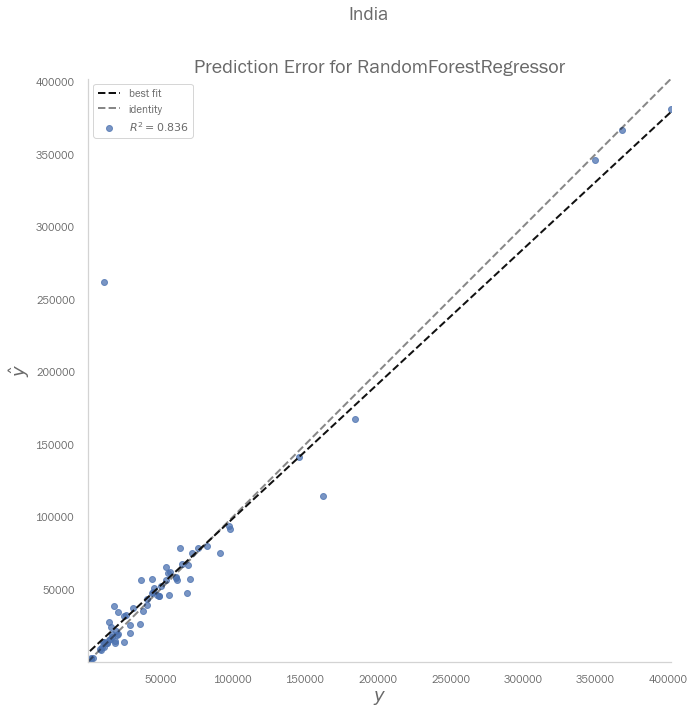

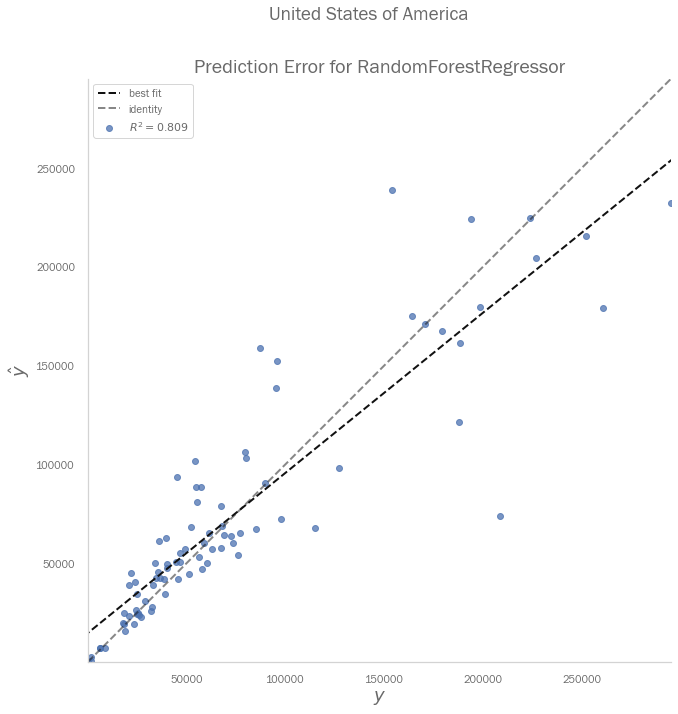

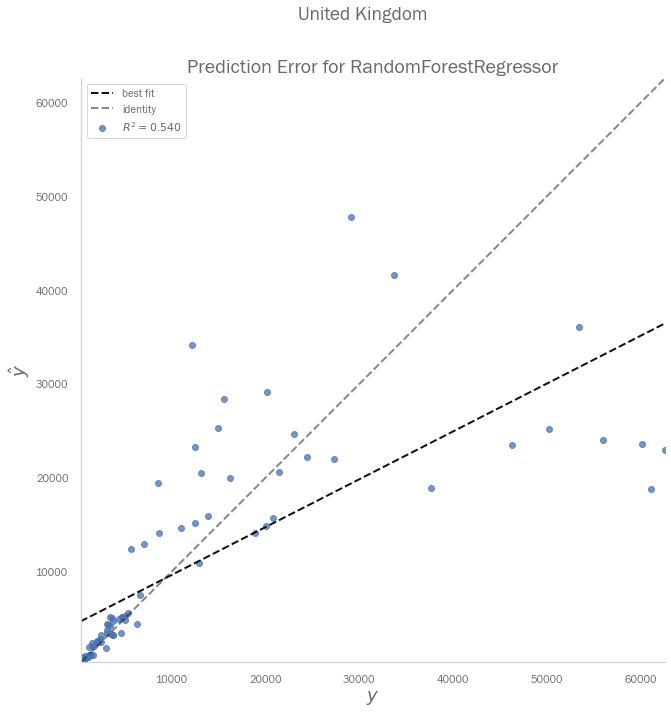

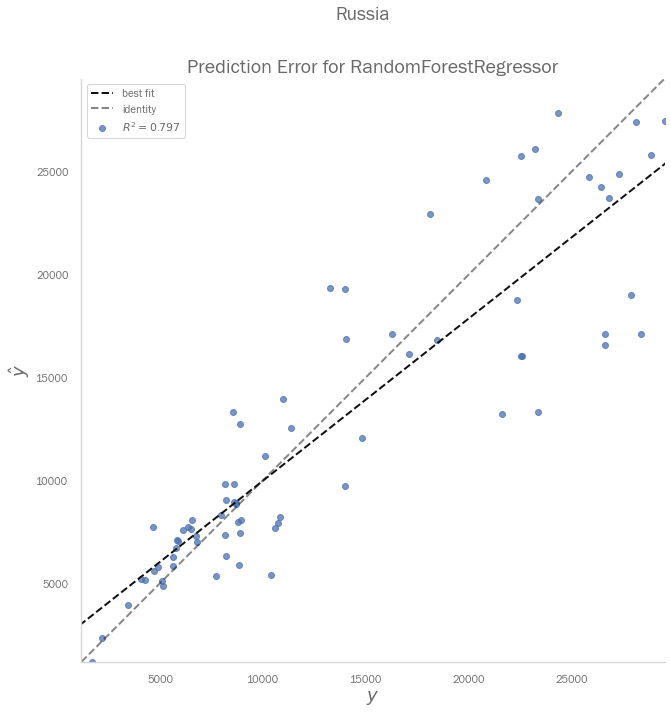

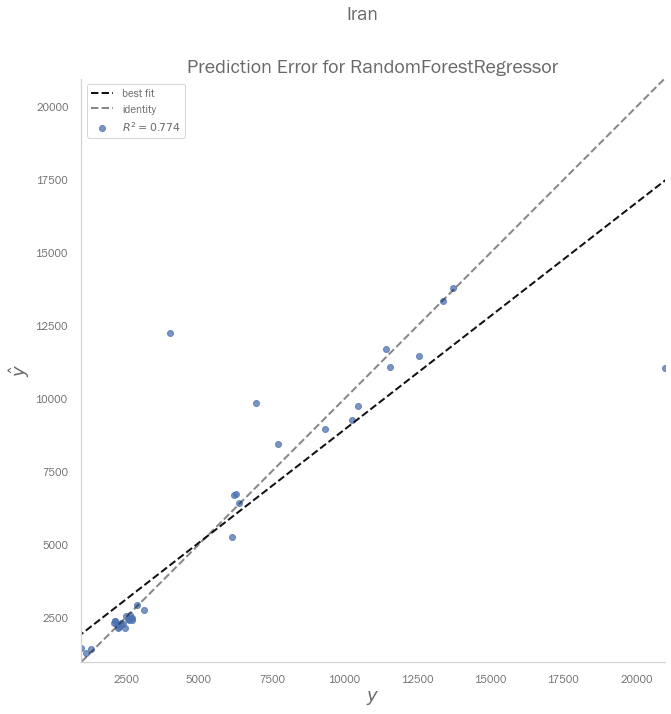

In [23]:
f_forest = plt.figure(figsize =(10,10))
f_forest.suptitle("India")
viz_india_rfr = prediction_error(india_rfr, train_india_x, train_india_y, test_india_x, test_india_y)

f1_forest = plt.figure(figsize=(10,10))
f1_forest.suptitle("United States of America")
viz_usa_rfr = prediction_error(usa_rfr, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2_forest = plt.figure(figsize=(10,10))
f2_forest.suptitle("United Kingdom")
viz_uk_rfr = prediction_error(uk_rfr, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3_forest = plt.figure(figsize = (10,10))
f3_forest.suptitle("Russia")
viz_russia_rfr = prediction_error(russia_rfr, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4_forest = plt.figure(figsize = (10,10))
f4_forest.suptitle("Iran")
viz_iran_rfr = prediction_error(iran_rfr, train_iran_x, train_iran_y, test_iran_x, test_iran_y)

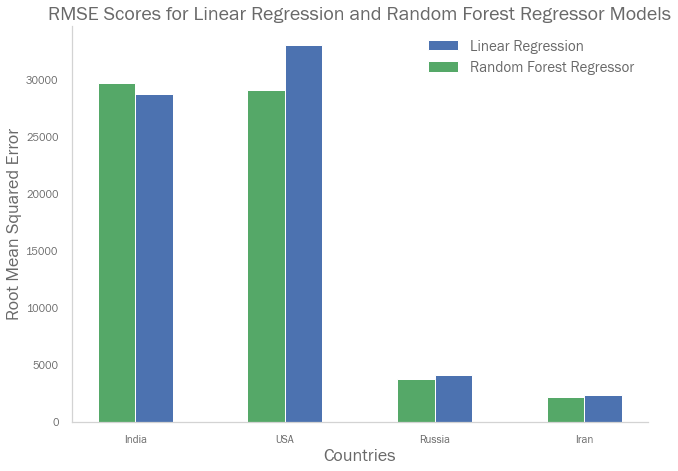

In [24]:
#ADD YTICK
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries1 , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries1 , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")
fig.savefig('E:/webapp/rmse_for_lreg/rmse_for_lreg.png', bbox_inches = "tight")

In [25]:
csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
dataframe = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases"])
dataframe['date'] = pd.to_datetime(dataframe.date)
dataframe.dropna(inplace=True)
dataframe.tail()

,location,date,new_cases
86431,Zimbabwe,2021-05-02,21.0
86432,Zimbabwe,2021-05-03,12.0
86433,Zimbabwe,2021-05-04,34.0
86434,Zimbabwe,2021-05-05,30.0
86435,Zimbabwe,2021-05-06,41.0


In [26]:
data_ind_arima = dataframe[dataframe['location'] == 'India']
data_usa_arima = dataframe[dataframe['location'] == 'United States']
data_uk_arima = dataframe[dataframe['location'] == 'United Kingdom']
data_russia_arima = dataframe[dataframe['location'] == 'Russia']
data_iran_arima = dataframe[dataframe['location'] == 'Iran']

In [27]:
india_param = (5,2,5)
usa_param = (5,1,4)
uk_param = (5,2,3)
russia_param = (5,2,5)
iran_param = (5,2,5)

In [28]:
def evaluateModel(data, param):
    X = data['new_cases'].values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=param)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [29]:
india_arima_rmse = evaluateModel(data_ind_arima, india_param) 
print(india_arima_rmse)

predicted=34592.137788, expected=31118.000000
predicted=38067.620065, expected=36604.000000
predicted=40835.694557, expected=35551.000000
predicted=35785.033711, expected=36595.000000
predicted=34811.905711, expected=36652.000000
predicted=36614.490932, expected=36011.000000
predicted=30604.669356, expected=32981.000000
predicted=28146.339804, expected=26567.000000
predicted=31217.074125, expected=32080.000000
predicted=34552.316671, expected=31521.000000
predicted=31685.801643, expected=29373.000000
predicted=29732.529664, expected=30031.000000
predicted=30256.171640, expected=30254.000000
predicted=24924.477164, expected=27071.000000
predicted=22399.351571, expected=22065.000000
predicted=25666.038364, expected=26382.000000
predicted=27917.142346, expected=24010.000000
predicted=23801.585396, expected=22890.000000
predicted=23177.526574, expected=25152.000000
predicted=25220.156306, expected=26624.000000
predicted=21003.045358, expected=24337.000000
predicted=19756.839694, expected=1

In [30]:
usa_arima_rmse = evaluateModel(data_usa_arima, usa_param)
print(usa_arima_rmse)

predicted=144284.669369, expected=155533.000000
predicted=180932.335833, expected=140234.000000
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=123558.940462, expected=160570.000000
predicted=181243.181815, expected=188219.000000
predicted=163831.873675, expected=202557.000000
predicted=174776.150708, expected=223613.000000
predicted=228041.702272, expected=232785.000000
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
predicted=226465.571647, expected=215542.000000
predicted=191093.793890, expected=181012.000000
predicted=202266.409214, expected=194858.000000
predicted=221730.782839, expected=224492.

In [31]:
uk_arima_rmse = evaluateModel(data_uk_arima, uk_param)
print(uk_arima_rmse)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


LinAlgError: LU decomposition error.

In [32]:
russia_arima_rmse = evaluateModel(data_russia_arima, russia_param)
print(russia_arima_rmse)

predicted=26847.714470, expected=26046.000000
predicted=25852.230751, expected=26126.000000
predicted=26032.113346, expected=25043.000000
predicted=26434.732133, expected=27829.000000
predicted=28830.059367, expected=27078.000000
predicted=27295.648687, expected=28450.000000
predicted=27783.146241, expected=28701.000000
predicted=28200.827049, expected=27798.000000
predicted=27604.028244, expected=25752.000000
predicted=26964.669881, expected=25838.000000
predicted=26980.909415, expected=27562.000000
predicted=28142.169685, expected=28206.000000
predicted=28475.114997, expected=27729.000000
predicted=28054.560687, expected=27651.000000
predicted=26902.700021, expected=26902.000000
predicted=25818.721086, expected=26265.000000
predicted=26244.663173, expected=26074.000000
predicted=27144.558705, expected=27787.000000
predicted=28292.578632, expected=28116.000000
predicted=28254.916332, expected=27772.000000
predicted=27801.781243, expected=28510.000000
predicted=27596.607272, expected=2

In [33]:
iran_arima_rmse = evaluateModel(data_iran_arima, iran_param)
print(iran_arima_rmse)

predicted=11513.369160, expected=10827.000000
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
predicted=11035.426434, expected=11023.000000
predicted=10918.549730, expected=10223.000000
predicted=10260.443957, expected=10403.000000
predicted=9969.578527, expected=9384.000000
predicted=8904.767749, expected=8411.000000
predicted=7749.108428, expected=7451.000000
predicted=7020.471052, expected=7501.000000
predicted=7168.974953, expected=7704.000000
predicted=7641.044038, expected=7603.000000
predicted=7490.259789, expected=7453.000000
predicted=6811.291650, expected=7121.000000
predicted=6541.210259, expected=6421.000000
predicted=5719.348088, expected=6312.000000
predicted=6095.013641, expected=6151.000000
predicted=6059.498241, expected=6208.000000
predicted=6445.403805, expected=6261.000

In [34]:
rmse_for_arima = list()
rmse_for_arima.extend([india_arima_rmse, usa_arima_rmse, russia_arima_rmse, iran_arima_rmse])

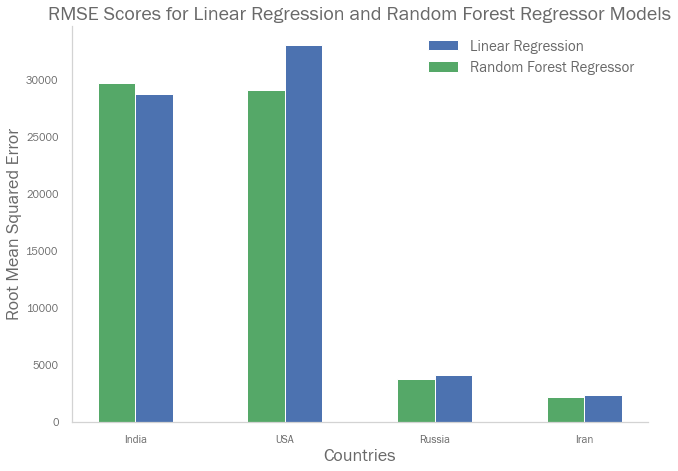

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries1 , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries1 , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")
fig.savefig('E:/webapp/rmse_for_rfr/rmse_for_rfr.png', bbox_inches = "tight")

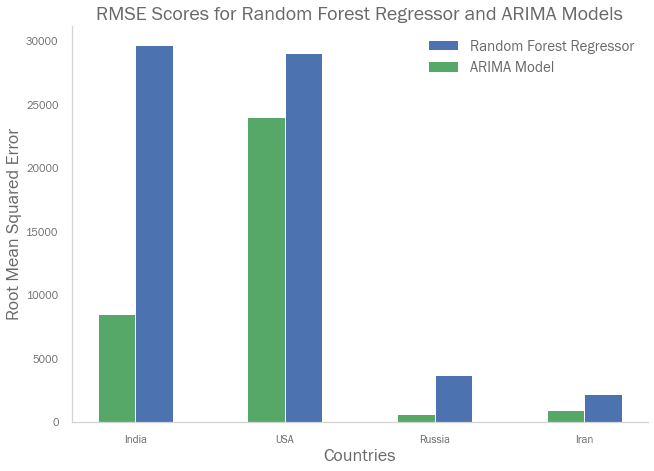

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries1 , rmse_for_rfr, color = 'b', width = 0.25, align='edge' )

ax.bar(countries1 , rmse_for_arima, color = 'g', width = -0.25, align='edge')
plt.legend(['Random Forest Regressor', 'ARIMA Model'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Random Forest Regressor and ARIMA Models")
fig.savefig('E:/webapp/rmse_lreg_rfr/rmse_lreg_rfr.png', bbox_inches = "tight")

In [37]:
india_arima = ARIMA(data_ind_arima['new_cases'], order = (5,2,5))
india_arima_fit = india_arima.fit()

In [38]:
usa_arima = ARIMA(data_usa_arima['new_cases'], order = (5,1,4))
usa_arima_fit = usa_arima.fit()

In [39]:
uk_arima = ARIMA(data_uk_arima['new_cases'], order = (5,2,3))
uk_arima_fit = uk_arima.fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [40]:
russia_arima = ARIMA(data_russia_arima['new_cases'], order = (5,2,5))
russia_arima_fit = russia_arima.fit()

In [41]:
iran_arima = ARIMA(data_iran_arima['new_cases'], order = (5,2,5))
iran_arima_fit = iran_arima.fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [42]:
india_forecasts = india_arima_fit.forecast(steps = 7)

usa_forecasts = usa_arima_fit.forecast(steps = 7)
uk_forecasts = uk_arima_fit.forecast(steps = 7)
russia_forecasts = russia_arima_fit.forecast(steps = 7)
iran_forecasts = iran_arima_fit.forecast(steps = 7)

In [43]:
dates = list()
for i in range(7):
    date = date.today()
    increment = timedelta(days = i)
    date = date + increment
    dates.append(date)
    
    
print(dates)

[datetime.date(2021, 5, 7), datetime.date(2021, 5, 8), datetime.date(2021, 5, 9), datetime.date(2021, 5, 10), datetime.date(2021, 5, 11), datetime.date(2021, 5, 12), datetime.date(2021, 5, 13)]


In [44]:
forecastdict = {'Date': dates, 'India': india_forecasts}
forecastdata = pd.DataFrame(forecastdict, columns = ['Date', 'India'])

print(forecastdata)

           Date          India
463  2021-05-07  416637.097188
464  2021-05-08  410681.610404
465  2021-05-09  391395.692040
466  2021-05-10  386570.829129
467  2021-05-11  413318.661293
468  2021-05-12  437838.859516
469  2021-05-13  442039.544151


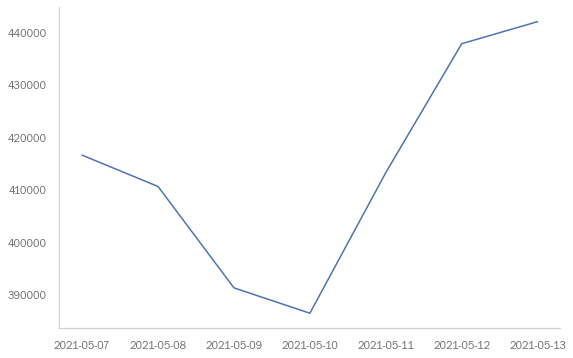

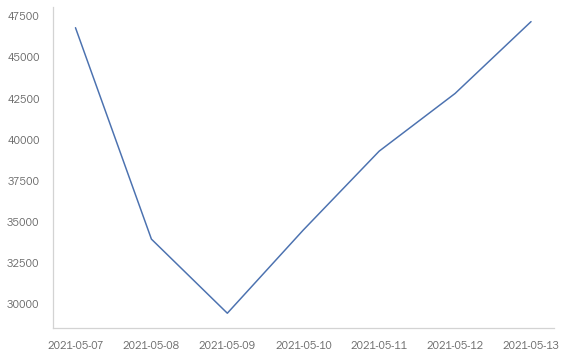

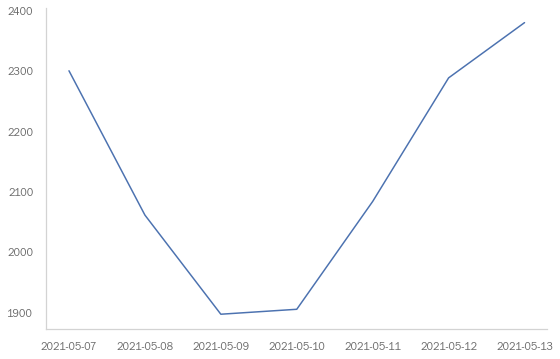

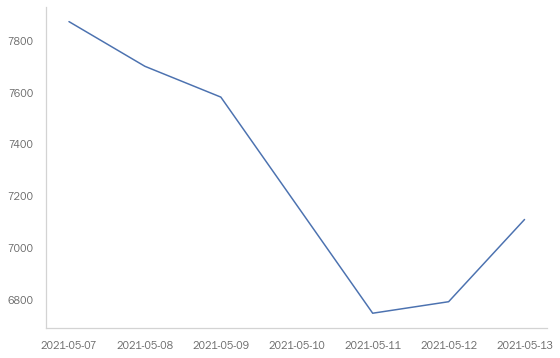

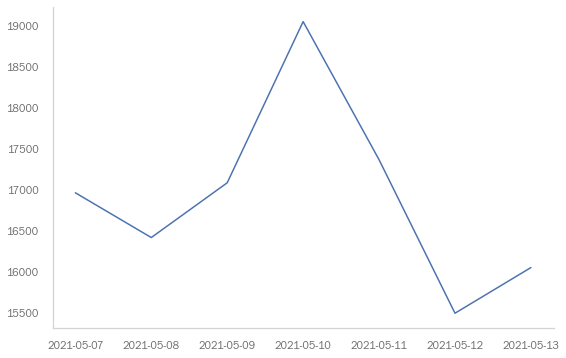

In [45]:
fig=plt.figure(figsize=(12,10))
plt.plot(dates, india_forecasts)
plt.grid()
plt.yticks(india_forecasts)
plt.show()
fig.savefig('E:/webapp/india_forecast/india_forecast.png', bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(dates, usa_forecasts)
plt.grid()
plt.yticks(usa_forecasts)
plt.show()
fig1.savefig('E:/webapp/usa_forecast/usa_forecast.png', bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(dates, uk_forecasts)
plt.grid()
plt.yticks(uk_forecasts)
plt.show()
fig2.savefig('E:/webapp/uk_forecast/uk_forecast.png', bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(dates, russia_forecasts)
plt.grid()
plt.yticks(russia_forecasts)
plt.show()
fig3.savefig('E:/webapp/russia_forecast/russia_forecast.png', bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(dates, iran_forecasts)
plt.grid()
plt.yticks(iran_forecasts)
plt.show()
fig4.savefig('E:/webapp/iran_forecast/iran_forecast.png', bbox_inches = "tight")